In [1]:
# Overview

# In this assignment, you will be tasked with developing a classification model using Artificial 
# Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into 
# predefined categories of alphabets. 
# This exercise aims to deepen your understanding of ANNs and the significant role 
# hyperparameter tuning plays in enhancing model performance.

# Dataset: "Alphabets_data.csv"
# The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification 
# task aimed at identifying different alphabets. 
# Before using this data in your model, you'll need to preprocess it to ensure optimal performance.

In [2]:
!pip install tensorflow

In [3]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV

In [4]:
# Loading the dataset

df = pd.read_csv("Alphabets_data.csv")
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
# Exploratory data analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.shape

(20000, 17)

In [7]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [9]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [10]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [11]:
# Handling missing values
# No missing values in any column

df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [12]:
# Encoding categorical variables

# Identifying categorical columns

df_categorical_only = df.select_dtypes(include=np.object)
df_categorical_only

C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\419416527.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_categorical_only = df.select_dtypes(include=np.object)


,letter
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [13]:
from sklearn.preprocessing import LabelEncoder
cols = ['letter']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\2498553843.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xbox'])


<Axes: xlabel='xbox', ylabel='Density'>

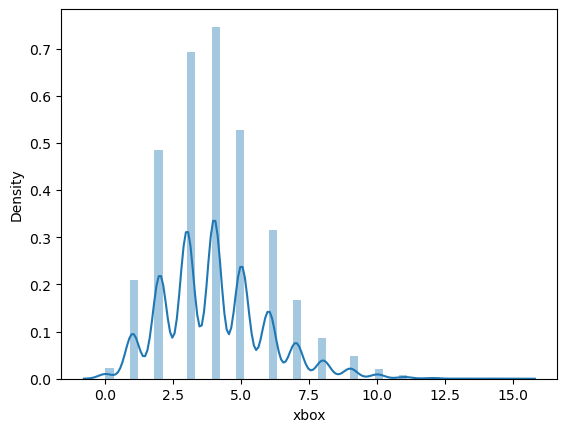

In [14]:
# Visualizations

sns.distplot(df['xbox'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\3125517999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['width'])


<Axes: xlabel='width', ylabel='Density'>

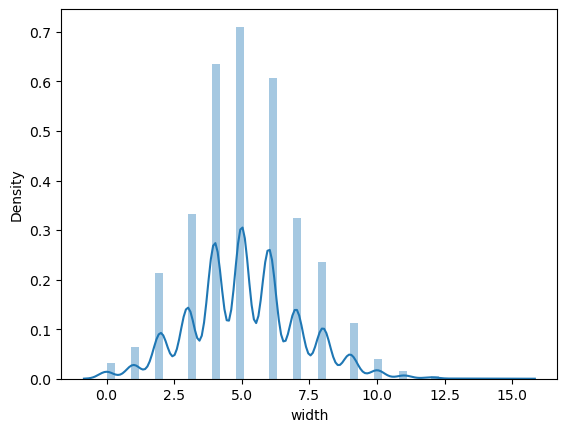

In [15]:
sns.distplot(df['width'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\2049717312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['onpix'])


<Axes: xlabel='onpix', ylabel='Density'>

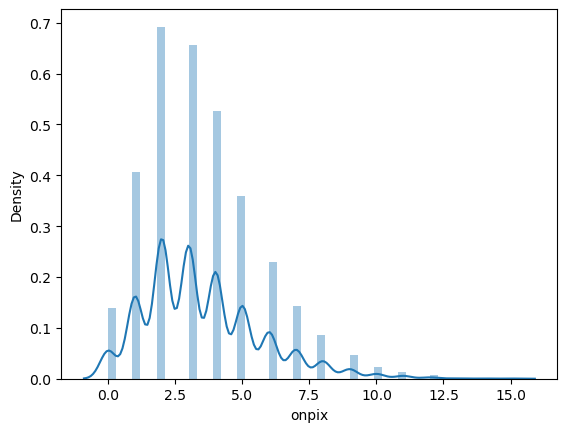

In [16]:
sns.distplot(df['onpix'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\2974842910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['xedge'])


<Axes: xlabel='xedge', ylabel='Density'>

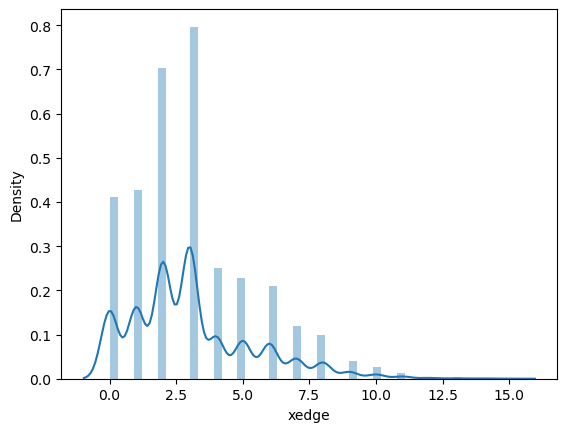

In [17]:
sns.distplot(df['xedge'])

C:\Users\mihir\AppData\Local\Temp\ipykernel_21392\3147223552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yedgex'])


<Axes: xlabel='yedgex', ylabel='Density'>

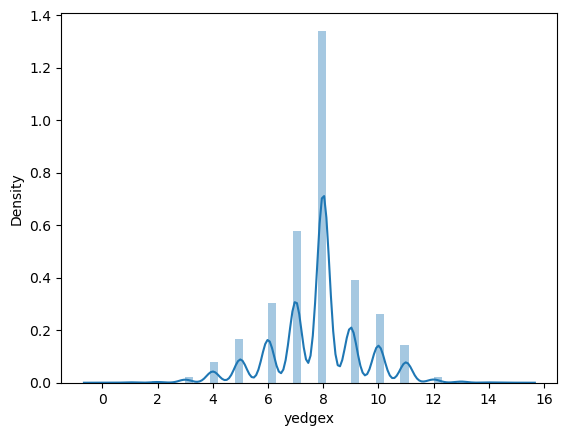

In [18]:
sns.distplot(df['yedgex'])

In [19]:
# Feature extraction

x = df.drop('yedge',axis=1)
x

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,8


In [20]:
y = df['yedge']
y

0        0
1        4
2        3
3        2
4        5
        ..
19995    3
19996    3
19997    2
19998    5
19999    2
Name: yedge, Length: 20000, dtype: int64

In [21]:
# Train the datasets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [22]:
# Define the keras model

kerasmodel = Sequential() # Initializing model - Dense for fully connected layer
kerasmodel.add(Dense(12, input_dim=16, activation='relu')) # First hidden layer
kerasmodel.add(Dense(16, activation='relu')) # Avoid exploding gradient problem
kerasmodel.add(Dense(1, activation='sigmoid')) # Output is binary

C:\Users\mihir\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compile the model

kerasmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Model fitting

kerasmodel.fit(x_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.1030 - loss: -43414.2969
Epoch 2/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.1033 - loss: -1213970.6250
Epoch 3/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.1016 - loss: -5263821.5000
Epoch 4/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.1040 - loss: -12773470.0000
Epoch 5/5
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.1052 - loss: -24838812.0000


In [25]:
# Train accuracy

_, accuracy = kerasmodel.evaluate(x_train,y_train)
print('Train Accuracy : %.2f' % (accuracy*100))

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.1068 - loss: -36588276.0000
Train Accuracy : 10.34


In [26]:
# Test accuracy

_, accuracy = kerasmodel.evaluate(x_test,y_test)
print('Test Accuracy : %.2f' % (accuracy*100))

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.0918 - loss: -38602384.0000
Test Accuracy : 9.62


In [27]:
y_pred = kerasmodel.predict(x_test)
y_pred

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0, 465,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 385,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 502,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 600,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 604,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 432,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 343,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 259,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 210,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0, 138,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,  33,   0,   0,   

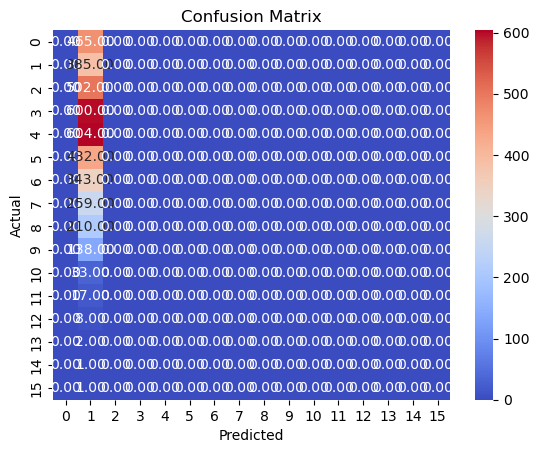

In [29]:
# Visualize the confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       465
           1       0.10      1.00      0.18       385
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00       600
           4       0.00      0.00      0.00       604
           5       0.00      0.00      0.00       432
           6       0.00      0.00      0.00       343
           7       0.00      0.00      0.00       259
           8       0.00      0.00      0.00       210
           9       0.00      0.00      0.00       138
          10       0.00      0.00      0.00        33
          11       0.00      0.00      0.00        17
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.10      4000
   macro avg       0.01   

C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mihir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
!pip install keras

In [32]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Define the keras model

def create_model(optimizer = 'Adam'):
    kerasmodel = Sequential() # Initializing model - Dense for fully connected layer
    kerasmodel.add(Dense(12, input_dim=16, activation='relu')) # First hidden layer
    kerasmodel.add(Dense(16, activation='relu')) # Avoid exploding gradient problem
    kerasmodel.add(Dense(1, activation='sigmoid')) # Output is binary
    kerasmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return kerasmodel

In [34]:
# Hyperparameter tuning

from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model)
model

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x000001DA35244CA0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [35]:
optimizer = ['SGD','Adadelta','RMSprop','Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)
parameter_grid

{'optimizer': ['SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adam']}

In [41]:
grid=GridSearchCV(estimator= model, param_grid=parameter_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(x,y)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mihir\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mihir\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\mihir\anaconda3\lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\mihir\anaconda3\lib\site-packages\scikeras\wrappers.py", line 938, in _fit
    self._fit_keras_model(
  File "C:\Users\mihir\anaconda3\lib\site-packages\scikeras\wrappers.py", line 535, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "C:\Users\mihir\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\mihir\anaconda3\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode characters in position 23-42: character maps to <undefined>


In [ ]:
print(grid_result.best_score_)
print(grid_result.best_params_)